In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

# Determining evolutionary context of genes

In [ ]:
# This code was used to eventually compile the Fisher table for genes that were not differentially expressed
# This will take longer to run than the DEG analysis because there are a LOT more genes

In [2]:
species_list = ['celeste', 'magna', 'natalis']
DEG_dict = {}

for s in species_list:
    
    s_df_name = 'df_' + str(s) #create dataframe for this iteration
    data = pd.read_csv(str(s) + "_ogs.csv") #read in cleaned file of ogs per spp
    data = data.set_index('orthogroup').T #set index column to 'orthogroup', then transpose df
    data.reset_index(drop=True, inplace=True) #reset index

    #save file to remove index row upon reread
    data.to_csv(str(s) +'_ogs_edit_nonDEG.csv', index=False)
    og_df = pd.read_csv(str(s) +'_ogs_edit_nonDEG.csv', index_col=False)
    
    #create species OG:TX dictionaries
    species_og_dict = {i:list(og_df[i]) for i in og_df.columns}
    
    species_dict = {}
    
    for i,j in species_og_dict.items():
        species_dict[i] = " ".join([str(k) for k in j]) # aka dm_dict
    #end up with dictionary with OG as Keys and transcript names as Values
    
    #pull in DEG info from DESeq2 run and use rownames as search terms in the respective dictionary
    # pull in both tissues first, and then timepoints
    
    tissue_list = ['GL', 'AN']
    t_dict = {}
    
    for t in tissue_list:
        
        t_df_name = 'df_' + str(s) + '_' + str(t) #create dataframe for this iteration
        
        time_point_list = ['acute', 'extreme', 'recovery']
        tp_dict = {}
        
        for tp in time_point_list:
            
            tp_df_name = 'df_' + str(s) + '_'+ str(t) +'_'+ str(tp) #create dataframe for this iteration
            
            species_lfc_data = pd.read_csv("lfc_" + str(s) + "_" + str(t) + "_" + str(tp) + "_nonDEG.csv")
            species_lfc_data = species_lfc_data.rename(columns={'Unnamed: 0': 'transcript'}) #rename unnamed column 
            
            species_lfc_dict = {}
            
            for i,j in species_dict.items():
                for x in species_lfc_data['transcript']:
                    if x in j:
                        species_lfc_dict[i]=x
            
            tp_dict[tp_df_name]= species_lfc_dict
            print("step 1 for " + str(tp) + " completed")
        
        t_dict[t_df_name] = tp_dict
        print("step 2 for " + str(t) + " completed")
    
    DEG_dict[s_df_name] = t_dict
    print('step 3 for ' + str(s) + " completed")

#We now have a dictionary of the OG:TX for all species x tissue x time point combinations
# we want to join this to the lfc dictionary to link these names to the lfc data from DESeq2
# and finally to the table of OG gene count numbers so we have all this data in one place for DEGs

step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for GL completed
step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for AN completed
step 3 for celeste completed
step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for GL completed
step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for AN completed
step 3 for magna completed
step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for GL completed
step 1 for acute completed
step 1 for extreme completed
step 1 for recovery completed
step 2 for AN completed
step 3 for natalis completed


In [3]:
DEG_dfs = {}

for outerKey, innerDict in DEG_dict.items():
    for innerKey, values in innerDict.items():
        DEG_dfs[(outerKey,
                innerKey)] = values

#turn this new dictionary into a multiindex dataframe

DEG_dfs = pd.DataFrame(DEG_dfs)
DEG_dfs

df_celeste  \
                                                            df_celeste_GL   
df_celeste_AN_acute                                                   NaN   
df_celeste_AN_extreme                                                 NaN   
df_celeste_AN_recovery                                                NaN   
df_celeste_GL_acute     {'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...   
df_celeste_GL_extreme   {'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...   
df_celeste_GL_recovery  {'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...   
df_magna_AN_acute                                                     NaN   
df_magna_AN_extreme                                                   NaN   
df_magna_AN_recovery                                                  NaN   
df_magna_GL_acute                                                     NaN   
df_magna_GL_extreme                                                   NaN   
df_magna_GL_recovery                                                  NaN   
df_natalis_AN_acute                                                   NaN   
df_natalis_AN_extreme                                                 NaN   
df_natalis_AN_recovery                                                NaN   
df_natalis_GL_acute                                                   NaN   
df_natalis_GL_extreme                                                 NaN   
df_natalis_GL_recovery                                                NaN   

                                                                           \
                                                            df_celeste_AN   
df_celeste_AN_acute     {'OG0000002': 'TRINITY_DN45762_c3_g4_i11', 'OG...   
df_celeste_AN_extreme   {'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...   
df_celeste_AN_recovery  {'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...   
df_celeste_GL_acute                                                   NaN   
df_celeste_GL_extreme                                                 NaN   
df_celeste_GL_recovery                                                NaN   
df_magna_AN_acute                                                     NaN   
df_magna_AN_extreme                                                   NaN   
df_magna_AN_recovery                                                  NaN   
df_magna_GL_acute                                                     NaN   
df_magna_GL_extreme                                                   NaN   
df_magna_GL_recovery                                                  NaN   
df_natalis_AN_acute                                                   NaN   
df_natalis_AN_extreme                                                 NaN   
df_natalis_AN_recovery                                                NaN   
df_natalis_GL_acute                                                   NaN   
df_natalis_GL_extreme                                                 NaN   
df_natalis_GL_recovery                                                NaN   

                                                                 df_magna  \
                                                              df_magna_GL   
df_celeste_AN_acute                                                   NaN   
df_celeste_AN_extreme                                                 NaN   
df_celeste_AN_recovery                                                NaN   
df_celeste_GL_acute                                                   NaN   
df_celeste_GL_extreme                                                 NaN   
df_celeste_GL_recovery                                                NaN   
df_magna_AN_acute                                                     NaN   
df_magna_AN_extreme                                                   NaN   
df_magna_AN_recovery                                                  NaN   
df_magna_GL_acute       {'OG0000002': 'TRINITY_DN22775_c5_g1_i4', 'OG0...   
df_magna_GL_extreme     {'OG0000002': 'TRINITY_DN22775_c5

In [4]:
#use stack and reset_index to remove multi-indices
all_spp_df = DEG_dfs.stack().reset_index().drop(columns= "level_1").rename(columns= {"level_0":"species_tissue_tp_info"})
all_spp_df

#need to make a column ("species") that merges all species columns into one...
#subset by first column into species, drop columns with NAs, make new column with spp name, 
#and then pd.concat all three

,species_tissue_tp_info,df_celeste,df_magna,df_natalis
0,df_celeste_AN_acute,"{'OG0000002': 'TRINITY_DN45762_c3_g4_i11', 'OG...",NaN,NaN
1,df_celeste_AN_extreme,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",NaN,NaN
2,df_celeste_AN_recovery,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",NaN,NaN
3,df_celeste_GL_acute,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",NaN,NaN
4,df_celeste_GL_extreme,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",NaN,NaN
5,df_celeste_GL_recovery,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",NaN,NaN
6,df_magna_AN_acute,NaN,"{'OG0000002': 'TRINITY_DN22775_c5_g1_i4', 'OG0...",NaN
7,df_magna_AN_extreme,NaN,"{'OG0000002': 'TRINITY_DN22775_c5_g1_i4', 'OG0...",NaN
8,df_magna_AN_recovery,NaN,"{'OG0000002': 'TRINITY_DN22775_c5_g1_i4', 'OG0...",NaN
9,df_magna_GL_acute,NaN,"{'OG0000002': 'TRINITY_DN22775_c5_g1_i4', 'OG0...",NaN


In [5]:
species_list = ['celeste', 'magna', 'natalis']
int_dict = {}

for s in species_list:
    df_name = "df_" + str(s)
    int_dict[df_name] = all_spp_df[all_spp_df['species_tissue_tp_info'].isin(["df_" + s + "_GL_acute", "df_" + s +"_GL_extreme", 
                                                              "df_" + s + "_GL_recovery", "df_" + s + "_AN_acute",
                                                              "df_" + s + "_AN_extreme", "df_" + s + "_AN_recovery"])]
    int_dict[df_name].dropna(axis="columns", inplace=True)
    int_dict[df_name]['species'] = str(s)
    int_dict[df_name] = int_dict[df_name].rename(columns= {"df_" + str(s):"tx_dict"})
    
    conditions = [
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_acute"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_extreme"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_recovery"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_acute"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_extreme"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_recovery")
    ]
    
    values = ["gill", 'gill', 'gill', 'antennal_gland', 'antennal_gland', 'antennal_gland']
    
    int_dict[df_name]["tissue"] = np.select(conditions, values)
    
    tp_conditions = [
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_acute"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_extreme"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_GL_recovery"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_acute"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_extreme"),
        (int_dict[df_name]["species_tissue_tp_info"] == "df_" + str(s) + "_AN_recovery")
    ]
    
    tp_values = ["acute", 'extreme', 'recovery', "acute", 'extreme', 'recovery']
    
    int_dict[df_name]["time_point"] = np.select(tp_conditions, tp_values)
    
all_spp_TXOG = pd.concat(int_dict)
all_spp_TXOG.reset_index(inplace=True)
all_spp_TXOG.drop(columns= ["level_0", "level_1", "species_tissue_tp_info"], inplace=True)
all_spp_TXOG

,tx_dict,species,tissue,time_point
0,"{'OG0000002': 'TRINITY_DN45762_c3_g4_i11', 'OG...",celeste,antennal_gland,acute
1,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",celeste,antennal_gland,extreme
2,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",celeste,antennal_gland,recovery
3,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",celeste,gill,acute
4,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",celeste,gill,extreme
5,"{'OG0000001': 'TRINITY_DN47759_c1_g3_i35', 'OG...",celeste,gill,recovery
6,"{'OG0000002': 'TRINITY_DN22775_c5_g1_i4', 'OG0...",magna,antennal_gland,acute
7,"{'OG0000002': 'TRINITY_DN22775_c5_g1_i4', 'OG0...",magna,antennal_gland,extreme
8,"{'OG0000002': 'TRINITY_DN22775_c5_g1_i4', 'OG0...",magna,antennal_gland,recovery
9,"{'OG0000002': 'TRINITY_DN22775_c5_g1_i4', 'OG0...",magna,gill,acute


In [6]:
all_spp_TXOG = pd.concat([all_spp_TXOG.drop(['tx_dict'], axis=1), all_spp_TXOG['tx_dict'].apply(pd.Series)], axis=1)
all_spp_TXOG

,species,tissue,time_point,OG0000002,OG0000003,OG0000004,OG0000005,OG0000007,OG0000008,OG0000009,...,OG0016985,OG0017128,OG0017180,OG0003123,OG0003795,OG0007847,OG0008216,OG0011896,OG0012749,OG0017659
0,celeste,antennal_gland,acute,TRINITY_DN45762_c3_g4_i11,TRINITY_DN46345_c1_g1_i2,TRINITY_DN43502_c0_g2_i8,TRINITY_DN47782_c0_g1_i12,TRINITY_DN47208_c5_g2_i23,TRINITY_DN47830_c3_g2_i6,TRINITY_DN47417_c7_g1_i7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,celeste,antennal_gland,extreme,TRINITY_DN45762_c3_g4_i11,TRINITY_DN46345_c1_g1_i2,TRINITY_DN43502_c0_g2_i8,TRINITY_DN47782_c0_g1_i12,TRINITY_DN47208_c5_g2_i23,TRINITY_DN47830_c3_g2_i6,TRINITY_DN47417_c7_g1_i7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,celeste,antennal_gland,recovery,TRINITY_DN45762_c3_g4_i11,TRINITY_DN46345_c1_g1_i2,TRINITY_DN43502_c0_g2_i8,TRINITY_DN47782_c0_g3_i1,TRINITY_DN47208_c5_g2_i23,TRINITY_DN47830_c3_g2_i6,TRINITY_DN47417_c7_g1_i7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,celeste,gill,acute,NaN,NaN,TRINITY_DN43502_c0_g1_i22,TRINITY_DN47782_c0_g1_i12,TRINITY_DN47208_c5_g2_i23,TRINITY_DN47830_c3_g2_i6,TRINITY_DN46161_c7_g1_i1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,celeste,gill,extreme,NaN,NaN,NaN,TRINITY_DN47782_c0_g1_i12,TRINITY_DN47208_c5_g2_i23,TRINITY_DN47830_c3_g2_i6,TRINITY_DN47417_c7_g1_i7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,celeste,gill,recovery,NaN,NaN,NaN,TRINITY_DN47782_c0_g1_i12,TRINITY_DN47208_c5_g2_i23,TRINITY_DN47830_c3_g2_i6,TRINITY_DN47417_c7_g1_i7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,magna,antennal_gland,acute,TRINITY_DN22775_c5_g1_i4,TRINITY_DN24022_c5_g1_i26,TRINITY_DN19670_c0_g1_i1,TRINITY_DN25240_c0_g1_i5,TRINITY_DN23842_c0_g1_i2,NaN,TRINITY_DN24297_c6_g1_i4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,magna,antennal_gland,extreme,TRINITY_DN22775_c5_g1_i4,TRINITY_DN24022_c5_g1_i26,TRINITY_DN19670_c0_g1_i1,TRINITY_DN25240_c0_g1_i5,TRINITY_DN23842_c0_g1_i2,NaN,TRINITY_DN24297_c6_g1_i4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,magna,antennal_gland,recovery,TRINITY_DN22775_c5_g1_i4,TRINITY_DN24022_c5_g1_i26,TRINITY_DN19670_c0_g1_i1,TRINITY_DN25240_c0_g1_i4,TRINITY_DN23842_c0_g1_i2,NaN,TRINITY_DN24297_c6_g1_i4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,magna,gill,acute,TRINITY_DN22775_c5_g1_i4,NaN,NaN,TRINITY_DN25240_c0_g1_i5,TRINITY_DN23842_c0_g1_i2,NaN,TRINITY_DN24297_c6_g1_i22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_spp_TXOG_melt = pd.melt(all_spp_TXOG, id_vars =["species", "tissue", "time_point"])
all_spp_TXOG_melt.rename(columns = ({'variable':'orthogroup', 'value': "transcript"}), inplace = True)
all_spp_TXOG_melt = all_spp_TXOG_melt.dropna(subset=['transcript'])
all_spp_TXOG_melt.head()

,species,tissue,time_point,orthogroup,transcript
0,celeste,antennal_gland,acute,OG0000002,TRINITY_DN45762_c3_g4_i11
1,celeste,antennal_gland,extreme,OG0000002,TRINITY_DN45762_c3_g4_i11
2,celeste,antennal_gland,recovery,OG0000002,TRINITY_DN45762_c3_g4_i11
6,magna,antennal_gland,acute,OG0000002,TRINITY_DN22775_c5_g1_i4
7,magna,antennal_gland,extreme,OG0000002,TRINITY_DN22775_c5_g1_i4


In [8]:
#join the lfc_dict to the DEG df and the GeneCounts df
#but separate big df by species first since TX names are not unique across spp!

celeste_txog = all_spp_TXOG_melt[all_spp_TXOG_melt['species'] == "celeste"]
magna_txog = all_spp_TXOG_melt[all_spp_TXOG_melt['species'] == "magna"]
natalis_txog = all_spp_TXOG_melt[all_spp_TXOG_melt['species'] == "natalis"]

In [9]:
spp_lfc_TXOG = {}

for s in species_list:
    for t in tissue_list:
        lfc_data = {}
        for tp in time_point_list:
            df_name = str(s) + "_" + str(t) + "_" + str(tp) + "_lfc"
            data = pd.read_csv("lfc_" + str(s) + "_" + str(t) + "_" + str(tp) + "_nonDEG.csv")
            data = data.rename(columns={'Unnamed: 0': 'transcript'}) #rename unnamed column 
            lfc_data[df_name] = pd.DataFrame(data)
            
            #first merge lfc_dict with the TXOG df on 'transcript'
            if s == "celeste":
                lfc_data[df_name] = pd.merge(lfc_data[df_name], celeste_txog, on='transcript', how="left")
                #which transcript rows are duplicated...drop these since same transcript matched to multiple orthogroups
                #issues between salmon naming convention and Trinity's
                lfc_data[df_name].drop_duplicates(subset = "transcript", keep = False, inplace= True)
                #make column for absolute value of lfc
                lfc_data[df_name]['|lfc|'] = abs(lfc_data[df_name]['log2FoldChange'])
                lfc_data[df_name]['species'] = str(s)
                lfc_data[df_name]['tissue'] = str(t)
                lfc_data[df_name]["time_point"] = str(tp)
                
                #import GeneCounts table, and rename unnamed column
                gene_counts_df = pd.read_csv("Orthogroups.GeneCount.csv", sep='\t')
                gene_counts_df.rename(columns={'Unnamed: 0':'orthogroup'}, inplace=True)
                
                #merge with existing df
                lfc_data[df_name] = pd.merge(lfc_data[df_name], gene_counts_df, on='orthogroup', how='left')
                
                #distinguish assigned/unassigned transcripts and single/expanded gene families
                conditions = [
                    (lfc_data[df_name]['orthogroup'].isnull()),
                    (lfc_data[df_name]['celeste_pep'] == 1),
                    (lfc_data[df_name]['celeste_pep'] != 1)]
                
                values = ['unassigned', "single_copy", "expanded"]
                
                lfc_data[df_name]['gene_type'] = np.select(conditions, values)


                spp_lfc_TXOG[df_name] = lfc_data[df_name] #add to large dictionary outside of for loop
                
            elif s == "magna":
                lfc_data[df_name] = pd.merge(lfc_data[df_name], magna_txog, on='transcript', how="left")
                #which transcript rows are duplicated...drop these since same transcript matched to multiple orthogroups
                #issues between salmon naming convention and Trinity's
                lfc_data[df_name].drop_duplicates(subset = "transcript", keep = False, inplace= True)
                #make column for absolute value of lfc
                lfc_data[df_name]['|lfc|'] = abs(lfc_data[df_name]['log2FoldChange'])
                lfc_data[df_name]['species'] = str(s)
                lfc_data[df_name]['tissue'] = str(t)
                lfc_data[df_name]["time_point"] = str(tp)
                
                #import GeneCounts table, and rename unnamed column
                gene_counts_df = pd.read_csv("Orthogroups.GeneCount.csv", sep='\t')
                gene_counts_df.rename(columns={'Unnamed: 0':'orthogroup'}, inplace=True)
                
                #merge with existing df
                lfc_data[df_name] = pd.merge(lfc_data[df_name], gene_counts_df, on='orthogroup', how='left')
                
                #distinguish assigned/unassigned transcripts and single/expanded gene families
                conditions = [
                    (lfc_data[df_name]['orthogroup'].isnull()),
                    (lfc_data[df_name]['magna_pep'] == 1),
                    (lfc_data[df_name]['magna_pep'] != 1)]
                
                values = ['unassigned', "single_copy", "expanded"]
                
                lfc_data[df_name]['gene_type'] = np.select(conditions, values)


                spp_lfc_TXOG[df_name] = lfc_data[df_name] #add to large dictionary outside of for loop
                
            else:
                lfc_data[df_name] = pd.merge(lfc_data[df_name], natalis_txog, on='transcript', how="left")
                #which transcript rows are duplicated...drop these since same transcript matched to multiple orthogroups
                #issues between salmon naming convention and Trinity's
                lfc_data[df_name].drop_duplicates(subset = "transcript", keep = False, inplace= True)
                #make column for absolute value of lfc
                lfc_data[df_name]['|lfc|'] = abs(lfc_data[df_name]['log2FoldChange'])
                lfc_data[df_name]['species'] = str(s)
                lfc_data[df_name]['tissue'] = str(t)
                lfc_data[df_name]["time_point"] = str(tp)
                
                #import GeneCounts table, and rename unnamed column
                gene_counts_df = pd.read_csv("Orthogroups.GeneCount.csv", sep='\t')
                gene_counts_df.rename(columns={'Unnamed: 0':'orthogroup'}, inplace=True)
                
                #merge with existing df
                lfc_data[df_name] = pd.merge(lfc_data[df_name], gene_counts_df, on='orthogroup', how='left')
                
                #distinguish assigned/unassigned transcripts and single/expanded gene families
                conditions = [
                    (lfc_data[df_name]['orthogroup'].isnull()),
                    (lfc_data[df_name]['natalis_pep'] == 1),
                    (lfc_data[df_name]['natalis_pep'] != 1)]
                
                values = ['unassigned', "single_copy", "expanded"]
                
                
                lfc_data[df_name]['gene_type'] = np.select(conditions, values)


                spp_lfc_TXOG[df_name] = lfc_data[df_name] #add to large dictionary outside of for loop

#concatenate all dictionaries for this species into one 
#and export data as csv
                
all_spp_TXOG_lfc = pd.concat(spp_lfc_TXOG)
all_spp_TXOG_lfc = all_spp_TXOG_lfc.reset_index()
all_spp_TXOG_lfc = all_spp_TXOG_lfc.drop(columns= ["level_0", "level_1", "Total"])
all_spp_TXOG_lfc['expression_type'] = 'nonDEG'
all_spp_TXOG_lfc.to_csv("all_spp_t_tp_lfc_data_nonDEGs.csv") #woohoo!!! #this is the main product from this notebook

In [10]:
#all code below was just for fun. No need to plot these

#groupby spp, then tissue, then, tp, then gene type to .describe()
gob = all_spp_TXOG_lfc.groupby(["species", "tissue", "time_point", "gene_type"]).describe().stack().reset_index()
gob.to_csv("sum_stats_lfc_TXOG_nonDEGs.csv")

In [11]:
#subset data by spp and tissue to plot boxplots of lfc and |lfc|

celeste_GL = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "celeste") & (all_spp_TXOG_lfc["tissue"] == "GL")]
celeste_AN = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "celeste") & (all_spp_TXOG_lfc["tissue"] == "AN")]
magna_GL = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "magna") & (all_spp_TXOG_lfc["tissue"] == "GL")]
magna_AN = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "magna") & (all_spp_TXOG_lfc["tissue"] == "AN")]
natalis_GL = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "natalis") & (all_spp_TXOG_lfc["tissue"] == "GL")]
natalis_AN = all_spp_TXOG_lfc[(all_spp_TXOG_lfc['species'] == "natalis") & (all_spp_TXOG_lfc["tissue"] == "AN")]

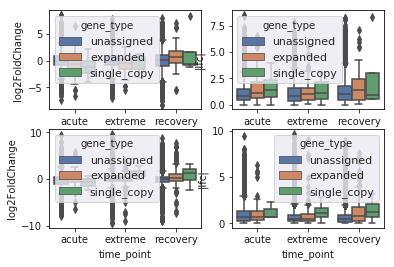

In [12]:
#celeste
f, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=celeste_GL, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[0,0])
sns.boxplot(data=celeste_GL, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[0,1])


sns.boxplot(data=celeste_AN, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[1,0])
sns.boxplot(data=celeste_AN, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[1,1])

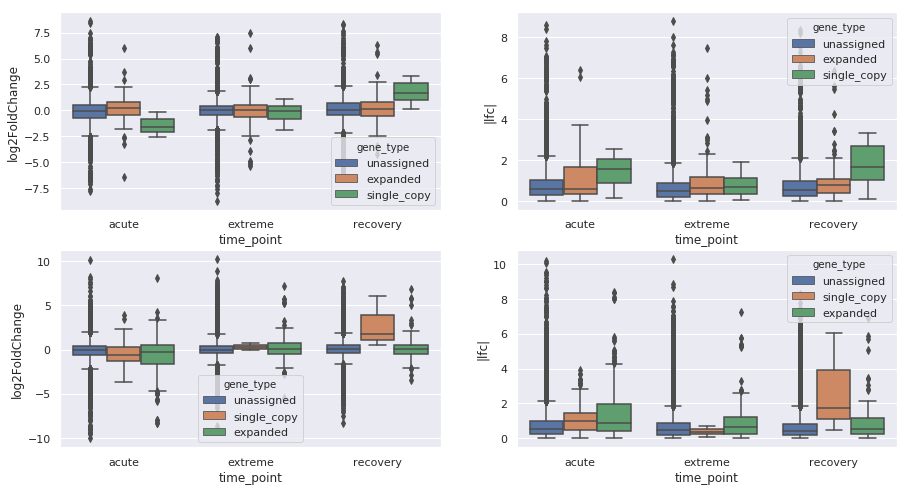

In [13]:
#magna
f, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=magna_GL, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[0,0])
sns.boxplot(data=magna_GL, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[0,1])

sns.boxplot(data=magna_AN, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[1,0])
sns.boxplot(data=magna_AN, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[1,1])

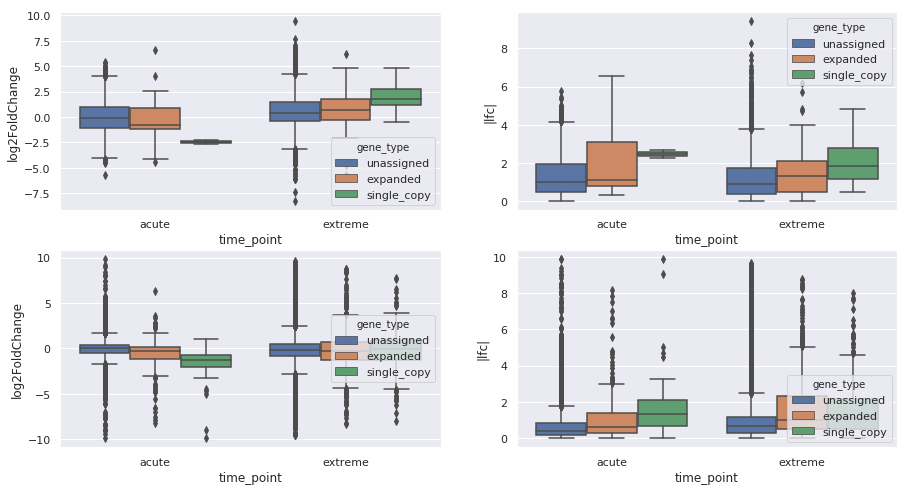

In [14]:
#magna
f, axes = plt.subplots(2, 2)
sns.set(rc = {'figure.figsize':(15,8)})

sns.boxplot(data=natalis_GL, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[0,0])
sns.boxplot(data=natalis_GL, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[0,1])

sns.boxplot(data=natalis_AN, y= "log2FoldChange", x= 'time_point', hue="gene_type", ax=axes[1,0])
sns.boxplot(data=natalis_AN, y= "|lfc|", x= 'time_point', hue="gene_type", ax=axes[1,1])